In [1]:
import os
os.chdir("../../")
os.getcwd()

'/home/mario/PhD/spatial_lda'

In [2]:
#########################

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns

from scipy.stats import t, skewnorm, cauchy, norm, chi2

from spatial_mix.utils import *

### Load all chains data and density estimates

In [4]:
datas = []
spmix_chains = []
spmix_dens = []
hdp_chains = []
hdp_dens = []
output_path = "data/simulation1/"

for i in range(3):
    data_filename = os.path.join(
        output_path + "data_scenario{0}.csv".format(i+1))
    datas.append(pd.read_csv(data_filename))
    
    spmix_chains_filename = os.path.join(
        output_path + "spmix_chains_scenario{0}.recordio".format(i+1))
    spmix_chains.append(loadChains(spmix_chains_filename))
    
    spmix_dens_filename = os.path.join(
        output_path + "spmix_dens_scenario{0}.pickle".format(i+1))
    with open(spmix_dens_filename, "rb") as fp:
        spmix_dens.append(pickle.load(fp))
    
    hdp_chains_filename = os.path.join(
        output_path + "hdp_chains_scenario{0}.recordio".format(i+1))
    hdp_chains.append(loadChains(hdp_chains_filename))
    
    hdp_dens_filename = os.path.join(
        output_path + "hdp_dens_scenario{0}.pickle".format(i+1))
    with open(hdp_dens_filename, "rb") as fp:
        hdp_dens.append(pickle.load(fp))

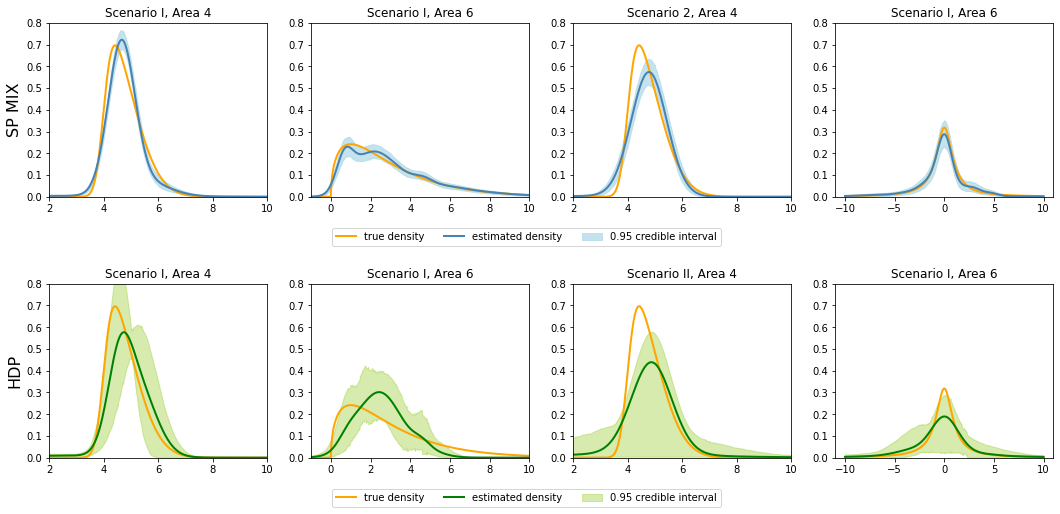

In [12]:
from spatial_mix.plots import density_plot

xgrid = spmix_dens[0]["xgrid"]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))

scenario = 1
density_plot(spmix_dens[scenario]["dens"][3], skewnorm.pdf(xgrid, 4, 4, 1), xgrid, axes[0][0], 
             "steelblue", "lightblue", "Scenario I, Area 4")
density_plot(spmix_dens[scenario]["dens"][5], chi2.pdf(xgrid, 3, 0, 1), xgrid, axes[0][1],
             "steelblue", "lightblue", "Scenario I, Area 6")

scenario = 2
density_plot(spmix_dens[scenario]["dens"][3], skewnorm.pdf(xgrid, 4, 4, 1), xgrid, axes[0][2],
             "steelblue", "lightblue", "Scenario 2, Area 4")
density_plot(spmix_dens[scenario]["dens"][5], cauchy.pdf(xgrid, 0, 1), xgrid, axes[0][3],
            "steelblue", "lightblue", "Scenario I, Area 6")

scenario = 1
density_plot(hdp_dens[scenario]["dens"][3], skewnorm.pdf(xgrid, 4, 4, 1), xgrid, axes[1][0],
             "green", "yellowgreen", "Scenario I, Area 4",  alpha=0.4)
density_plot(hdp_dens[scenario]["dens"][5], chi2.pdf(xgrid, 3, 0, 1), xgrid, axes[1][1],
             "green", "yellowgreen", "Scenario I, Area 6", alpha=0.4)

scenario = 2
density_plot(hdp_dens[scenario]["dens"][3], skewnorm.pdf(xgrid, 4, 4, 1), xgrid, axes[1][2],
             "green", "yellowgreen", "Scenario II, Area 4", alpha=0.4)
density_plot(hdp_dens[scenario]["dens"][5], cauchy.pdf(xgrid, 0, 1), xgrid, axes[1][3],
             "green", "yellowgreen", "Scenario I, Area 6",  alpha=0.4)



for i in range(2):
    for j in range(4):
        axes[i][j].set_ylim((0, 0.8))
    
    axes[i][1].set_xlim((-1, 10))
    axes[i][0].set_xlim((2, 10))
    axes[i][2].set_xlim((2, 10))

plt.subplots_adjust(hspace = 0.5)
axes[0][0].set_ylabel("SP MIX", fontsize=16)
axes[1][0].set_ylabel("HDP", fontsize=16)

axes[0][2].legend(bbox_to_anchor=(0.7, -0.15), ncol=3)
axes[1][2].legend(bbox_to_anchor=(0.7, -0.15), ncol=3)

plt.savefig("images/simulation1_densities.pdf")
plt.show()